<a href="https://colab.research.google.com/github/prabhhav/JupyterNotebooks/blob/main/SVM_Titanic_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
import pandas as pd

In [45]:
df_train = pd.read_csv("https://raw.githubusercontent.com/soaicbe/ml/master/titanic/train.csv")
df_test = pd.read_csv("https://raw.githubusercontent.com/soaicbe/ml/master/titanic/test.csv")

In [46]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [47]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [48]:
len(df_train)

891

In [49]:
dataset = df_train[['Pclass', 'Sex', 'Age', 'Survived']]
print("Total", len(dataset))
print(dataset.isnull().sum())

Total 891
Pclass        0
Sex           0
Age         177
Survived      0
dtype: int64


In [50]:
dataset = dataset.dropna()
print(len(dataset))

714


In [51]:
X = dataset[['Pclass', 'Sex', 'Age']]
y = dataset.Survived 

In [52]:
X.Sex.value_counts()

male      453
female    261
Name: Sex, dtype: int64

In [53]:
gender_map = {'male':0, 'female':1}

In [54]:
X['Sex'] = X.Sex.map(gender_map)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [55]:
X.Sex.value_counts()

0    453
1    261
Name: Sex, dtype: int64

In [56]:
X.head()

,Pclass,Sex,Age
0,3,0,22.0
1,1,1,38.0
2,3,1,26.0
3,1,1,35.0
4,3,0,35.0


In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8)
print("Total", len(X))
print("Train size", len(X_train))
print("Test size", len(X_test))

Total 714
Train size 571
Test size 143


In [58]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [59]:
y_predicted = model.predict(X_test)
y_predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [60]:
print("Train data", model.score(X_train, y_train))
print("Test data", model.score(X_test, y_test))

Train data 0.6304728546409807
Test data 0.5804195804195804


In [61]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[78,  5],
       [55,  5]])

Text(15.0, 0.5, 'Truth')

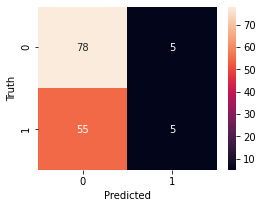

In [62]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(4,3))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [63]:
from sklearn import tree
model = tree.DecisionTreeClassifier()

In [64]:
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [65]:
print("Train data", model.score(X_train, y_train))
print("Test data", model.score(X_test, y_test))

Train data 0.8984238178633975
Test data 0.7832167832167832


Text(15.0, 0.5, 'Truth')

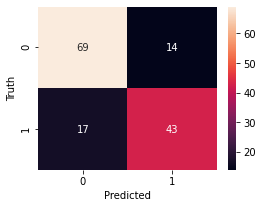

In [66]:
y_predicted = model.predict(X_test)
cm = confusion_matrix(y_test, y_predicted)
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(4,3))
sn.heatmap(cm,annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

*import graphviz
*from IPython.display import Image
* import pydotplus

* feature_names = X_train.columns

* dot_data = tree.export_graphviz(model, out_file=None, filled = True, rounded=True, feature_names = feature_names, class_names = str(y_train))

* graph = graphviz.Source(dot_data)
*graph

*Draw graph
*graph = pydotplus.graph_from_dot_data(dot_data)

*Show graph

*Image(graph.create_png())

In [67]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=200, criterion='gini')
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [68]:
print("Train data", model.score(X_train, y_train))
print("Test data", model.score(X_test, y_test))

Train data 0.8984238178633975
Test data 0.7692307692307693


Text(15.0, 0.5, 'Truth')

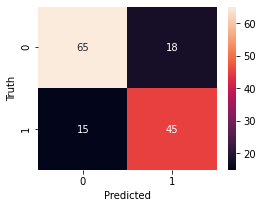

In [69]:
y_predicted = model.predict(X_test)
cm = confusion_matrix(y_test, y_predicted)

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(4,3))
sn.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')